In [3]:
import pandas as pd

In [4]:
tedx = pd.read_csv('ted_talks_en.csv') #Reading Dataset
tedx #Displaying Dataset

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society

In [5]:
tedx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [6]:
tedx = tedx[['title', 'speaker_1', 'topics', 'description', 'url', 'related_talks']].copy() #Choosing required columns of dataset
tedx.head(1)

,title,speaker_1,topics,description,url,related_talks
0,Averting the climate crisis,Al Gore,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...,https://www.ted.com/talks/al_gore_averting_the...,"{243: 'New thinking on the climate crisis', 54..."


In [7]:
tedx.isnull().sum() #Checking for null entries

title            0
speaker_1        0
topics           0
description      0
url              0
related_talks    0
dtype: int64

In [8]:
tedx.duplicated().sum() #Checking for duplicate entries

0

In [9]:
def data_cleaner(x):
    x=x.replace("'", '')
    x=x.replace('[', '')
    x=x.replace(']', '')
    x=x.replace(',', '')
    return x.lower()


In [10]:
import ast

tedx['uncleaned_title']=tedx['title'].apply(lambda x : x.lower())
tedx['title']=tedx['title'].apply(lambda x : data_cleaner(x))
tedx['topics']=tedx['topics'].apply(lambda x : x.replace(' ', '').replace(',', ' '))
tedx['topics']=tedx['topics'].apply(lambda x : data_cleaner(x))
tedx['description']=tedx['description'].apply(lambda x : data_cleaner(x))
tedx['speaker_1']=tedx['speaker_1'].apply(lambda x : x.replace(' ', '').lower())
tedx['related_talks']=tedx['related_talks'].apply(lambda x : [y.lower() for y in list(ast.literal_eval(x).values())])
tedx.head()

,title,speaker_1,topics,description,url,related_talks,uncleaned_title
0,averting the climate crisis,algore,alternativeenergy cars climatechange culture e...,with the same humor and humanity he exuded in ...,https://www.ted.com/talks/al_gore_averting_the...,"[new thinking on the climate crisis, the busin...",averting the climate crisis
1,the best stats youve ever seen,hansrosling,africa asia google demo economics globalissues...,youve never seen data presented like this. wit...,https://www.ted.com/talks/hans_rosling_the_bes...,"[own your body's data, a visual history of hum...",the best stats you've ever seen
2,simplicity sells,davidpogue,computers entertainment interfacedesign media ...,new york times columnist david pogue takes aim...,https://www.ted.com/talks/david_pogue_simplici...,"[10 top time-saving tech tips, the first secre...",simplicity sells
3,greening the ghetto,majoracarter,macarthurgrant activism business cities enviro...,in an emotionally charged talk macarthur-winni...,https://www.ted.com/talks/majora_carter_greeni...,"[3 stories of local eco-entrepreneurship, a ne...",greening the ghetto
4,do schools kill creativity?,sirkenrobinson,children creativity culture dance education pa...,sir ken robinson makes an entertaining and pro...,https://www.ted.com/talks/sir_ken_robinson_do_...,"[bring on the learning revolution!, how to esc...",do schools kill creativity?


In [11]:
tedx['tags']=tedx['title']+' '+tedx['speaker_1']+' '+tedx['topics']+' '+tedx['description'] #Creating a new 'Tags' column
tedx=tedx[['tags', 'uncleaned_title', 'url', 'related_talks']]
tedx.head()

,tags,uncleaned_title,url,related_talks
0,averting the climate crisis algore alternative...,averting the climate crisis,https://www.ted.com/talks/al_gore_averting_the...,"[new thinking on the climate crisis, the busin..."
1,the best stats youve ever seen hansrosling afr...,the best stats you've ever seen,https://www.ted.com/talks/hans_rosling_the_bes...,"[own your body's data, a visual history of hum..."
2,simplicity sells davidpogue computers entertai...,simplicity sells,https://www.ted.com/talks/david_pogue_simplici...,"[10 top time-saving tech tips, the first secre..."
3,greening the ghetto majoracarter macarthurgran...,greening the ghetto,https://www.ted.com/talks/majora_carter_greeni...,"[3 stories of local eco-entrepreneurship, a ne..."
4,do schools kill creativity? sirkenrobinson chi...,do schools kill creativity?,https://www.ted.com/talks/sir_ken_robinson_do_...,"[bring on the learning revolution!, how to esc..."


In [12]:
tedx.iloc[0]['tags']

'averting the climate crisis algore alternativeenergy cars climatechange culture environment globalissues science sustainability technology with the same humor and humanity he exuded in "an inconvenient truth" al gore spells out 15 ways that individuals can address climate change immediately from buying a hybrid to inventing a new hotter brand name for global warming.'

In [13]:
from nltk.corpus import stopwords
from nltk import word_tokenize

stopwords_en=stopwords.words('english')
tedx['tags']=tedx['tags'].apply(lambda x : ' '.join([word for word in word_tokenize(x) if word not in stopwords_en]))
tedx.iloc[0]['tags']

"averting climate crisis algore alternativeenergy cars climatechange culture environment globalissues science sustainability technology humor humanity exuded `` inconvenient truth '' al gore spells 15 ways individuals address climate change immediately buying hybrid inventing new hotter brand name global warming ."

In [14]:
def tag_cleaner(tag):
    words=tag.split()
    cleaned_word=[word.replace(')', '').replace('(', '').replace('?', '').replace('—', '').replace("'", "").replace('.', '').replace('`', '') for word in words]
    cleaned_tag=' '.join(cleaned_word)
    return cleaned_tag

tedx['tags']=tedx['tags'].apply(lambda x : tag_cleaner(x))

In [15]:
#Function to convert words into root word

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def stem(text):
    stemmed_word_list=[]
    for i in text.split():
        stemmed_word_list.append(ps.stem(i))
    return ' '.join(stemmed_word_list)

In [16]:
#Removing common irrelevent English words (Stop Words)
#Vectorizing the data, choosing 5000 most frequent words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

tedx['tags']=tedx['tags'].apply(lambda x : stem(x)) #Converting words in 'tag' into their root form
vectors = cv.fit_transform(tedx['tags']).toarray() 
tedx.iloc[0]['tags']

'avert climat crisi algor alternativeenergi car climatechang cultur environ globalissu scienc sustain technolog humor human exud inconveni truth al gore spell 15 way individu address climat chang immedi buy hybrid invent new hotter brand name global warm'

In [17]:
# Compute the total number of words in the combined string of tags for determining max_features

allTagsString = ''
for videoIndex in range(len(tedx)):
    allTagsString += tedx.iloc[videoIndex]['tags']

allTagsString=allTagsString.split()

removeDuplicate = set(allTagsString)
allTagsString = ' '.join(removeDuplicate)

print(allTagsString)

tagLength=len(allTagsString)
meanTagLength = tagLength // len(tedx)
print(f'Total Tag Length = {tagLength}, Tag Length per video = {meanTagLength}')

noam ai-jen hector ecstasi early-warn honey zikabrain classif cmu dent data-bubbl powermyth euna thucydidess industriyouv sibl homarocantu madhumitamurgia hyper-r tug-of-war linear polestori transcend diffrient helmet engin branson begun memori résumé katehartman raymond vim kenni stuartfirestein high-pow campisi jeremiah daria lindahil pamelamey normanlear find canopi amyherman servic sarahmontana slide olúfẹ́mi porn excelhigh christoph kugel mess estupinyà okumu fashion/art daybrain homag interconnected investor américo persecut mishra vii rosewould nutrit eliasson justifi olesya rewir islam formeveri taylorelvish mcchrystal authoritarian lavignsolv plotkin jacquelinewoodson waytoler usbold answertell jmaranto jackiesavitz generstudi chatrou odyssey gustafson meanart shameem craftiv loui mouli misirliogludraw yael disagr saysolv boykin andersonuse elizabethlev gchq lyra astrolog tyndal multi-player… manu crusad malign victorvescovo chenwin realidad tabloid replica wow-inspir strang

In [18]:
cv.get_feature_names_out() #Displaying the 5000 words after stemming

array(['10', '100', '1000', ..., 'zombi', 'zone', 'zoologist'],
      dtype=object)

In [19]:
#Calculating cosine similarity of every video

from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)
similarity

array([[1.        , 0.02666904, 0.0833655 , ..., 0.02087869, 0.06117355,
        0.06906139],
       [0.02666904, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0833655 , 0.        , 1.        , ..., 0.06440082, 0.06289709,
        0.02366905],
       ...,
       [0.02087869, 0.        , 0.06440082, ..., 1.        , 0.01575243,
        0.        ],
       [0.06117355, 0.        , 0.06289709, ..., 0.01575243, 1.        ,
        0.12157836],
       [0.06906139, 0.        , 0.02366905, ..., 0.        , 0.12157836,
        1.        ]])

In [20]:
#Converting into a tuple to get index of videos

list(enumerate(similarity[0]))

[(0, 0.9999999999999999),
 (1, 0.02666903735313325),
 (2, 0.08336550215650926),
 (3, 0.03001501125938321),
 (4, 0.030528125543633176),
 (5, 0.028618190351607124),
 (6, 0.05405405405405406),
 (7, 0.0),
 (8, 0.05405405405405406),
 (9, 0.08219949365267865),
 (10, 0.15007505629691606),
 (11, 0.08561170049453902),
 (12, 0.05723638070321425),
 (13, 0.06213697660012),
 (14, 0.0),
 (15, 0.0),
 (16, 0.07897471897389846),
 (17, 0.02567480829815484),
 (18, 0.08000711205939975),
 (19, 0.06774581282657174),
 (20, 0.056388387443460086),
 (21, 0.02567480829815484),
 (22, 0.055577001437672836),
 (23, 0.07702442489446452),
 (24, 0.06575959492214292),
 (25, 0.23621543814299706),
 (26, 0.025993762245501817),
 (27, 0.058123819371909635),
 (28, 0.07194017065667525),
 (29, 0.02567480829815484),
 (30, 0.06105625108726635),
 (31, 0.13334518676566626),
 (32, 0.06327719971683327),
 (33, 0.15042366316917008),
 (34, 0.047960113771116836),
 (35, 0.07045670884515312),
 (36, 0.027788500718836418),
 (37, 0.1066761494

In [21]:
#Sort cosine similarity of a video in descending order

sorted(list(enumerate(similarity[0])), reverse = True, key=lambda x : x[1])

[(0, 0.9999999999999999),
 (209, 0.4502251688907482),
 (1116, 0.3760591579229252),
 (435, 0.35135135135135137),
 (3607, 0.3340590762637293),
 (2092, 0.3259179368665352),
 (2433, 0.31666099733107167),
 (3944, 0.31589887589559384),
 (1773, 0.3157370009805859),
 (156, 0.3056735079072006),
 (3134, 0.3048524894165396),
 (3605, 0.30485248941653953),
 (3614, 0.29265855413946323),
 (3620, 0.29047729685263884),
 (3807, 0.28872213095403265),
 (1683, 0.28769822778437526),
 (3137, 0.28307731160107247),
 (1999, 0.2830773116010724),
 (2133, 0.28039985489311264),
 (2006, 0.26926023193385334),
 (3081, 0.2684624220856097),
 (538, 0.2666903735313325),
 (2143, 0.26401000024164994),
 (2554, 0.26109892811385205),
 (50, 0.25756371316446414),
 (3052, 0.2516835207052591),
 (3925, 0.24854790640047997),
 (2752, 0.24534987303147357),
 (3964, 0.24384310418680996),
 (3762, 0.24165612634006073),
 (78, 0.24012009007506568),
 (25, 0.23621543814299706),
 (2036, 0.23369063383728306),
 (3994, 0.22966561493131393),
 (257

In [22]:
def recommend(videos):
     video_index = tedx[tedx['uncleaned_title'] == videos].index[0] #Get video index
     distances = similarity[video_index] #Get array of cosine similarity values for the given video
     video_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x : x[1])[1:6] #Return a list of 5 most similar videos
       
     for i in video_list:
          if i[1] > 0.31:
               print(tedx.iloc[i[0]].url) #Print the url of the 5 most similar videos
          else:
               print('There are no more similar videos to recommend!')

     return video_list

In [23]:
def text_similarity(text):
    stopwords_en=stopwords.words('english')
    uncleaned_text=text.split()
    text=[]
    for word in uncleaned_text:
        if word not in stopwords_en:
            text.append(word)
    text=''.join(text) + ' '+' '.join(text)
    text=stem(text)

    text_sim=cosine_similarity(cv.transform([text]), vectors)
    video_list=sorted(list(enumerate(text_sim[0])), reverse = True, key = lambda x : x[1] if x[1] > 0.3 else 0)[0:5]
    for video in video_list:
        if video[1] > 0.31:
            print(tedx.iloc[video[0]].url)
        else:
            print('There are no more similar videos to recommend!')

#text_similarity('earth') #Test Input


In [24]:
def calSingleVideoAccuracy(watched_video, video_list):
    count=0
    for video in video_list:
        video_title=tedx.iloc[video[0]]['uncleaned_title']
        if video_title in tedx[watched_video == tedx['uncleaned_title']].iloc[0]['related_talks']:
            count+=1

    if count != 0:
        accuracy=1
    else:
        accuracy=0
    
    return accuracy

In [25]:
import matplotlib.pyplot as plt

def thresholdJustifier(pre_accuracy_list): #Calculates mean cosine similarity of videos that failed 1st Accuracy-Test to determine value of threshold.
    secondCheckList=[x for x in pre_accuracy_list if x[1] == 0]

    xVideoIndex=[x[0] for x in secondCheckList]
    yCosineSimilarity=[x[2] for x in secondCheckList]

    sumCosineSimilarity=sum(yCosineSimilarity)
    meanCosineSimilarity=sumCosineSimilarity/len(yCosineSimilarity)
    print(f'Mean Cosine Similarity = {meanCosineSimilarity}')

    plt.bar(xVideoIndex, yCosineSimilarity)

    plt.xlabel('Video Index')
    plt.ylabel('Cosine Similarity')
    plt.title('Cosine Similarity for Each Video (2nd Accuracy Test)')
    plt.show()
    

https://www.ted.com/talks/al_gore_new_thinking_on_the_climate_crisis/
https://www.ted.com/talks/james_hansen_why_i_must_speak_out_about_climate_change/
https://www.ted.com/talks/al_gore_what_comes_after_an_inconvenient_truth/
https://www.ted.com/talks/kelly_wanser_emergency_medicine_for_our_climate_fever/
https://www.ted.com/talks/al_gore_the_case_for_optimism_on_climate_change/
https://www.ted.com/talks/hans_rosling_let_my_dataset_change_your_mindset/
https://www.ted.com/talks/hans_rosling_new_insights_on_poverty/
https://www.ted.com/talks/hans_rosling_insights_on_hiv_in_stunning_data_visuals/
https://www.ted.com/talks/hans_and_ola_rosling_how_not_to_be_ignorant_about_the_world/
There are no more similar videos to recommend!
https://www.ted.com/talks/david_pogue_the_music_wars/
https://www.ted.com/talks/george_whitesides_toward_a_science_of_simplicity/
https://www.ted.com/talks/john_maeda_designing_for_simplicity/
There are no more similar videos to recommend!
There are no more simila

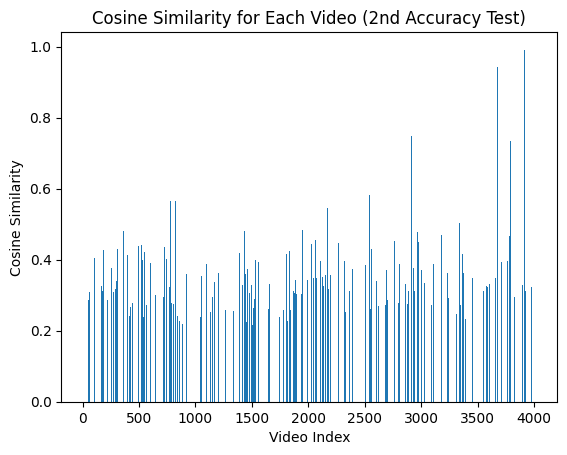

Accuracy = 0.8766541822721599


In [26]:
def calAccuracy():
    accuracy, similarity_threshold=0, 0.31
    accuracy_list, pre_accuracy_list=[], []
    for video_index in range(len(tedx)):
        watched_video=(tedx.iloc[video_index]['uncleaned_title'])
        video_list=recommend(watched_video)
        singleVideoAccuracyTuple=[video_index, calSingleVideoAccuracy(watched_video, video_list), video_list[0][1]]
        accuracy_list.append(singleVideoAccuracyTuple)
        pre_accuracy_list.append(list(singleVideoAccuracyTuple)) #Use 'list' to avoid referencing same 'singleVideoAccuracyTuple' element
        
        if accuracy_list[video_index][1] == 0:

            if video_list[0][1] > similarity_threshold:
                accuracy_list[video_index][1] = 1 
                
            #else:    

                #print('0', watched_video)
                #print('1', tedx.iloc[video_index]['related_talks'])
                #for video in video_list:
                    #print('2', tedx.iloc[video[0]]['uncleaned_title'])
            
        accuracy+=accuracy_list[video_index][1]
        
    thresholdJustifier(pre_accuracy_list)
    
    final_accuracy=accuracy/len(tedx)
    print(f'Accuracy = {final_accuracy}')
    #print(pre_accuracy_list)
    #print(accuracy_list)

calAccuracy()



In [27]:
watched_video=input('Enter title of watched video: ').lower().strip() #Taking input
if tedx['uncleaned_title'].eq(watched_video).any():
    video_list=recommend(watched_video) #Calling the 'recommend' function
else:
    text_similarity(watched_video)
#calSingleVideoAccuracy(watched_video, video_list)

https://www.ted.com/talks/quixotic_fusion_dancing_with_light/
https://www.ted.com/talks/judith_jamison_and_members_of_the_alvin_ailey_american_dance_theater_revelations_from_a_lifetime_of_dance/
https://www.ted.com/talks/trevor_copp_and_jeff_fox_ballroom_dance_that_breaks_gender_roles/
https://www.ted.com/talks/camille_a_brown_a_visual_history_of_social_dance_in_25_moves/
https://www.ted.com/talks/mallika_sarabhai_dance_to_change_the_world/


In [28]:
import pickle
pickle.dump(similarity,open('similarity.pkl','wb'))